<h1>Simple Linear Regression. Minimal Example</h1>

Import Libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

Generate Random Input Data to train on 

In [18]:
observations = 5000 #size of data
#np.random.uniform(low,high,size) i.e. random value from a uniform distribution (equal probility for num to be picked)
xs = np.random.uniform(0,10,(observations,1))
zs = np.random.uniform(0,10, (observations,1)) #we are creating a two variable model

#lets combine into one matrix
inputs = np.column_stack((xs,zs))
print(inputs.shape)

(5000, 2)


Create the targets we will aim at

In [19]:
#let the target be defined as targets = f(x,z) = 2*x - 3*z + 5 + noise
#obviously the weights are 2 and 3, and the bias is 5

noise = np.random.uniform(-1,1,(observations,1))
targets = 2*xs -3*zs +5 + noise
print(targets.shape)

(5000, 1)


Plot the training data

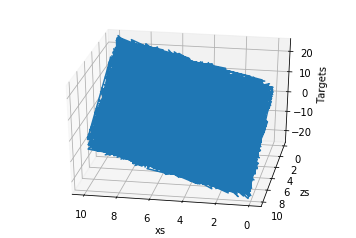

In [20]:
targets = targets.reshape(observations,)
fig = plt.figure();
ax = fig.add_subplot(111,projection='3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

Initialize Variables

In [21]:
init_range = 0.1
#our initial weights and biases will be picked randomly from the interval [-0.1,0.1]
weights = np.random.uniform(-init_range,init_range, size=(2,1)) #the size is 2x1 because we have two variables soo 1 weight per var

biases = np.random.uniform(-init_range, init_range, size= 1)


Set A Learning Rate

In [22]:
learning_rate = 0.022

Train the Model

In [23]:
#We want to minimize the loss function w/r to the weights and biases
#Game Plan: Calculate Outputs, compare output to targets via the loss, print the loss, adjust weight and biases
for i in range(300):
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets
    loss = np.sum(deltas ** 2) / 2 / observations #equal mean loss
    print(loss)
    deltas_scaled = deltas/observations
    weights = weights - learning_rate*np.dot(inputs.T,deltas_scaled) #we transposed inputs so that we are able to multiply matrices
    biases = biases- learning_rate * np.sum(deltas_scaled)
    

51.88193839587908
35.46134151846693
24.447210214197128
17.043503141613833
12.064265068948828
8.71434549025767
6.459498065483353
4.9406704046683325
3.9165437873983815
3.2249272689980635
2.7568117723147685
2.438931884693436
2.222045605382147
2.0730571334471737
1.9697225726157004
1.8970916213930213
1.84511602350262
1.8070422010484115
1.7783309389745703
1.75593130210725
1.7377926328587454
1.7225365635794563
1.709236575181161
1.6972698378958935
1.6862176330508527
1.6757984262736798
1.6658228858111517
1.656163650217105
1.6467350091307653
1.6374792466695796
1.6283574627830413
1.6193434042560584
1.6104193185058235
1.6015731669036168
1.59279675183696
1.5840844578991227
1.5754324058352842
1.5668378839035648
1.5582989656873525
1.5498142532220769
1.5413827043461643
1.5330035166593288
1.524676049526814
1.5163997716544566
1.508174225849979
1.4999990053352208
1.4918737378218105
1.483798074804685
1.475771684362565
1.4677942463154847
1.4598654489665253
1.4519849869083237
1.4441525595452334
1.4363678700

Print Weights and Biases and see if we have worked correctly

In [24]:
print(weights,biases)

[[ 2.17364287]
 [-2.82414795]] [2.98201372]


Plot last outputs vs targets

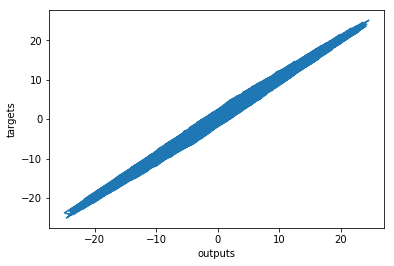

In [25]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()